<a href="https://colab.research.google.com/github/jlosar/Julio-Losa-ML-projeto/blob/main/MVP_Machine_Learning_%26_Analytics_Julio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Machine Learning & Analytics


*   Julio Cesar Losa Rodrigues
*   Matricula: 4052025001006
*   Dataset utilizado: Rossmann Store Sales (Kaggle)


# 1. Introdu√ß√£o:



*   **Objetivo:**

Fazer previs√£o de vendas futuras por loja e produto utilizando t√©cnicas de Machine Learning.

*   **Descri√ß√£o do problema**

Para qualquer gestor em uma empresa que trabalha com varejo fazer uma boa previs√£o do volume de vendas √© condi√ß√£o fundamental para o planejamento do ano em rela√ß√£o a previs√£o de receita, Log√≠stica e investimento (verba para promo√ß√µes, M√£o de obra e etc.). Esse trabalho tem por objetivo tornar a previs√£o de vendas mais precisa, confi√°vel e a for√ßa de vendas mais efici√™nte.

*   **Descri√ß√£o do Dataset:**

O dataset Rossmann Store Sales foi disponibilizado pelo Kaggle em uma competi√ß√£o de previs√£o de vendas. Ele cont√©m informa√ß√µes de vendas di√°rias de 1.115 lojas da rede de farm√°cias Rossmann na Europa, durante o per√≠odo de janeiro/2013 a julho/2015 (~2 anos e 7 meses).

*   **Desafios do Dataset:**

      1.   Alta variabilidade: vendas variam por loja, tipo, promo√ß√µes e sazonalidade.
      2.   Dados faltantes: algumas lojas n√£o possuem hist√≥rico completo de concorr√™ncia e promo√ß√µes.
      3.   Fatores externos: datas especiais, feriados e promo√ß√µes impactam fortemente as vendas.
      4.   S√©ries temporais m√∫ltiplas: mais de mil lojas diferentes, cada uma com comportamento pr√≥prio.

*   **Boas pr√°ticas que ser√£o utilizadas:**


    1. Documenta√ß√£o e coment√°rios
    2. Tratamento de dados faltantes: mediana, valores default, substitui√ß√£o.
    3. Engenharia de vari√°veis: cria√ß√£o de CompetitionAgeInMonths, Promo2AgeInMonths e Sales_log.
    4. Controle de seed (SEED)
    5. Valida√ß√£o temporal (TimeSeriesSplit): fundamental para s√©ries temporais, evitando vazamento de dados.
    6. Baseline (DummyRegressor)
    7. Compara√ß√£o de diferentes fam√≠lias de modelos (Ridge, Lasso, RF, XGB)
    8. Visualiza√ß√µes finais (R¬≤, RMSE, MAE)





# 2. Carga, Prepara√ß√£o e Limpeza dos dados:

(treino, valida√ß√£o, teste; valida√ß√£o cruzada; sempre evitando vazamento de dados)

## Configura√ß√µes iniciais, clonagem do reposit√≥rio e carregamento dos dados

Inicialmente essa parte foi a mais dificultosa, pois estava baixando o dataset diretamente do kaggle sempre que iria rodar o arquivo. Bem instru√≠do, consegui aprender a baixar para o Github.

O Arquivo "Train.csv", pelo seu tamanho, d√° uma complexidade maior em baix√°-lo para o diret√≥rio do Github, pois eu tenho que utilizar Git LFS e tem vezes que esse caminho executa sem nenhum problema, outras ele demonstra erro.

In [1]:
# ==============================================================================================================
# Imports necess√°rios
# ==============================================================================================================

import warnings
warnings.filterwarnings("ignore")

import pandas as pd # Respons√°vel por carregar dados, limpar, transformar e estruturar tabelas de dados
import numpy as np # Essencial para computa√ß√£o num√©rica em python
import matplotlib.pyplot as plt # Oferece uma interface similar ao MATLAB para gerar gr√°ficos e diagramas.
import seaborn as sns # Oferece uma interface de alto n√≠vel para a cria√ß√£o de gr√°ficos estat√≠sticos.
import time  # √â usado para trabalhar com tempo, por exemplo, para medir o tempo de execu√ß√£o de um bloco de c√≥digo

from sklearn.model_selection import train_test_split, TimeSeriesSplit, StratifiedKFold, KFold, RandomizedSearchCV, GridSearchCV # Ferramentas para dividir e validar os dados, o que √© crucial para treinar e testar modelos
from sklearn.compose import ColumnTransformer # Permite aplicar diferentes transforma√ß√µes a diferentes colunas de um conjunto de dados.
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Este m√≥dulo tem ferramentas para transformar os dados e prepar√°-los para o modelo.
from sklearn.pipeline import Pipeline # Cria um pipeline que encadeia m√∫ltiplas etapas de processamento e modelagem em um √∫nico objeto.
from sklearn.dummy import DummyClassifier, DummyRegressor # Modelos "de base" que n√£o aprendem nada. Eles s√£o usados para estabelecer um baseline, um ponto de partida para comparar o desempenho dos modelos reais.
from sklearn.linear_model import LogisticRegression, Ridge, Lasso # Este m√≥dulo cont√©m modelos de regress√£o e classifica√ß√£o lineares.
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # M√≥dulo para modelos que combinam m√∫ltiplos estimadores.
from sklearn.cluster import KMeans # Modelo para problemas de agrupamento (clustering).
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score,
                             silhouette_score) # Este m√≥dulo cont√©m todas as m√©tricas para avaliar o desempenho dos modelos.
from scipy.stats import randint, uniform # Esta linha importa fun√ß√µes do m√≥dulo stats da biblioteca SciPy. SciPy √© uma biblioteca de computa√ß√£o cient√≠fica em Python que √© frequentemente usada com NumPy e Pandas para tarefas complexas.
from IPython.display import display # √â uma fun√ß√£o que permite exibir objetos de forma rica e formatada.
from xgboost import XGBRegressor # Esta linha importa o modelo XGBRegressor da biblioteca XGBoost.
from tabulate import tabulate # √â uma biblioteca para formatar dados tabulares.

# Configura√ß√µes pandas
pd.set_option('display.width', None) # Essa linha define a largura m√°xima da tela de exibi√ß√£o para None. Isso instrui o Pandas a usar a largura total dispon√≠vel, garantindo que as tabelas de dados n√£o sejam cortadas ou quebras de linha indesejadas n√£o ocorram.
pd.set_option('display.max_columns', None) # Esta linha remove o limite padr√£o de colunas que o Pandas exibe. Ao definir None, √© garantido que todas as colunas sejam mostradas, facilitando a inspe√ß√£o.
pd.set_option('display.max_colwidth', None) # Essa op√ß√£o controla a largura m√°xima do texto dentro de cada c√©lula. Definindo-a como None, o Pandas n√£o truncar√° o conte√∫do das c√©lulas, mostrando a string completa, n√£o importa o qu√£o longa ela seja.
pd.set_option('display.float_format', '{:.2f}'.format) # Esta linha define o formato de exibi√ß√£o para todos os n√∫meros de ponto flutuante (floats) em um DataFrame.


# ==============================================================================================================
# Clonar reposit√≥rio e carregar dados
# ==============================================================================================================

# Obtendo os dados do reposit√≥rio e carregando no ambiente Colab
!rm -rf Julio-Losa-ML-projeto

# Esses comandos instalam e inicializam a extens√£o Git LFS (Large File Storage)
# Foi necess√°rio para lidar com o arquivo "Train.csv"
!apt-get install git-lfs
!git lfs install
!git clone https://github.com/jlosar/Julio-Losa-ML-projeto.git # Baixando os arquivos do meu reposit√≥rio do GitHub para o ambiente do Google Colab.
%cd Julio-Losa-ML-projeto #muda o diret√≥rio de trabalho atual para a pasta rec√©m clonada do meu projeto
!git lfs pull #Baixa os arquivos grandes que foram gerenciados pelo Git LFS, train.csv.
%cd .. #retorna o diret√≥rio de trabalho original

#Carregando os arquivos CSV
train = pd.read_csv("Julio-Losa-ML-projeto/Dados/train.csv")
test  = pd.read_csv("Julio-Losa-ML-projeto/Dados/test.csv")
store = pd.read_csv("Julio-Losa-ML-projeto/Dados/store.csv")

# ==============================================================================================================
# Verifica√ß√£o inicial
# ==============================================================================================================
print("Train shape:", train.shape) # Esta linha imprime o n√∫mero de linhas e colunas do DataFrame train.
print("Test shape:", test.shape) # Esta linha imprime o n√∫mero de linhas e colunas do DataFrame test.
print("Store shape:", store.shape) # Esta linha imprime o n√∫mero de linhas e colunas do DataFrame Shape.

# visualizar as cinco primeiras linhas de cada DataFrame.
display(train.head())
display(test.head())
display(store.head())

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Git LFS initialized.
Cloning into 'Julio-Losa-ML-projeto'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 89 (delta 45), reused 5 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (89/89), 545.40 KiB | 2.67 MiB/s, done.
Resolving deltas: 100% (45/45), done.
Encountered 2 file(s) that should have been pointers, but weren't:
	Dados/store.csv
	Dados/test.csv
[Errno 2] No such file or directory: 'Julio-Losa-ML-projeto #muda o diret√≥rio de trabalho atual para a pasta rec√©m clonada do meu projeto'
/content
Not in a git repository.
[Errno 2] No such file or directory: '.. #retorna o diret√≥rio de trabalho original'
/content
Train shape: (1017209, 9)
Test shape: (4108

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17  1.00      1            0              0
1   2      3          4  2015-09-17  1.00      1            0              0
2   3      7          4  2015-09-17  1.00      1            0              0
3   4      8          4  2015-09-17  1.00      1            0              0
4   5      9          4  2015-09-17  1.00      1            0              0

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a              1270.00                       9.00   
1      2         a          a               570.00                      11.00   
2      3         a          a             14130.00                      12.00   
3      4         c          c               620.00                       9.00   
4      5         a          a             29910.00                       4.00   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                   2008.00       0              NaN              NaN   
1                   2007.00       1            13.00          2010.00   
2                   2006.00       1            14.00          2011.00   
3                   2009.00       0              NaN              NaN   
4                   2015.00       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

## An√°lise da distribui√ß√£o dos dados

Intuito de entender a distribui√ß√£o e a qualidade dos dados.

*   Valores discrepantes (outliers)
*   Tend√™ncias centrais (m√©dia, mediana)
*   Dispers√£o dos dados (desvio padr√£o, range)
*   Poss√≠veis problemas de qualidade dos dados
*   Identifica√ß√£o de missing values

O que os dados nos retornou?

**"Count":** Mostra o n√∫mero de valores n√£o nulos em cada coluna.

1.   Store = 1115: Tenho dado para todas as lojas
2.   CompetitionDistance = 1112: Existem 3 valores ausentes (missing values), tratarei mais a frente no modelo.
1.   CompetitionOpenSinceMonth & CompetitionOpenSinceYear possuem 354 valores ausentes.
2.   Promo2SinceWeek & Promo2SinceYear possuem 544 valores ausentes.

**"Mean:"** A m√©dia dos valores em cada coluna.

1.   A m√©dia de CompetitionDistance √© 5404.90, o que significa que, em m√©dia, as lojas t√™m uma concorr√™ncia a uma dist√¢ncia de cerca de 5,4 km.
2.   A m√©dia de Promo2 √© 0.51, o que indica que cerca de 51% das lojas participam da Promo√ß√£o 2.

**"Std (standard deviation) = Desvio padr√£o:"**  mede a dispers√£o ou a varia√ß√£o dos dados em torno da m√©dia.

1.   Um desvio padr√£o alto, como o de CompetitionDistance (7663.17), sugere que os dados est√£o muito espalhados. Existem lojas com concorrentes muito pr√≥ximos e outras com concorrentes muito distantes.

**"Min:"** O valor m√≠nimo de cada coluna.

1.   A menor CompetitionDistance √© 20.00 metros.
2.   O menor valor de Promo2 √© 0.00, confirmando que algumas lojas n√£o participam.

**"25%, 50% (mediana), 75%:"** S√£o os quartis. Eles dividem os dados em quatro partes iguais e s√£o essenciais para identificar a distribui√ß√£o e poss√≠veis outliers.

1.   50% (mediana): A mediana de CompetitionDistance √© 2325.00. Isso significa que metade das lojas tem um concorrente a uma dist√¢ncia de at√© 2.325 metros. Note que a mediana √© bem menor que a m√©dia (5404.90), o que sugere que os dados de CompetitionDistance s√£o assim√©tricos e provavelmente cont√™m valores extremos (outliers).

"**Max:**" O valor m√°ximo em cada coluna.

1.   O valor m√°ximo de CompetitionDistance √© 75860.00, ou seja, mais de 75 km. Indicativo que mais tarde pode ser identificado como um outlier no modelo




In [2]:
# Informa√ß√µes sobre as vendas, o comportamento dos clientes e a frequ√™ncia de promo√ß√µes.

pd.set_option('display.float_format', lambda x: '%.2f' % x) # Comando para configurar o comportamento de exibi√ß√£o do Pandas.
store.describe() # Fun√ß√£o para identificar a distribui√ß√£o dos dados, a presen√ßa de outliers ou valores discrepantes.

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count 1115.00              1112.00                     761.00   
mean   558.00              5404.90                       7.22   
std    322.02              7663.17                       3.21   
min      1.00                20.00                       1.00   
25%    279.50               717.50                       4.00   
50%    558.00              2325.00                       8.00   
75%    836.50              6882.50                      10.00   
max   1115.00             75860.00                      12.00   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  
count                    761.00 1115.00           571.00           571.00  
mean                    2008.67    0.51            23.60          2011.76  
std                        6.20    0.50            14.14             1.67  
min                     1900.00    0.00             1.00          2009.00  
25%                     2006.00    0.00            13.00          2011.00  
50%                     2010.00    1.00            22.00          2012.00  
75%                     2013.00    1.00            37.00          2013.00  
max                     2015.00    1.00            50.00          2015.00

## Tratando Missing Values

√â importante tratar missing values em modelos de Machine Learning pois

1.   Algoritmos quebram: Muitos modelos n√£o funcionam com valores missing
2.   Vi√©s nos modelos: Padr√µes podem ser aprendidos de forma incorreta
1.   Performance reduzida: Previs√µes menos precisas e confi√°veis

Segue a tratativa das colunas necess√°rias

*   Tratando a coluna "CompetitionDistance"

Irei √∫tilizar a M√©dia para preencher os dados das colunas vazias e com isso evitarei que o modelo superestime o impacto da concorr√™ncia para lojas sem dados  

*   Tratando as Colunas de Competi√ß√£o e de Promo√ß√£o

O objetivo √© transformar as colunas de competi√ß√£o e promo√ß√£o em uma √∫nica vari√°vel que capture a idade da concorr√™ncia e o tempo de promo√ß√£o.


In [3]:
# ==============================================================================================================
# Identifica√ß√£o de Missing Values
# ==============================================================================================================

store.isnull().sum()
    #".isnull()": √â uma fun√ß√£o que percorre cada c√©lula do DataFrame e retorna True se a c√©lula estiver vazia (nula) e False se contiver um valor.
    #".sum()": Soma o resultado de ".isnull()". Como Python trata True como 1 e False como 0, o .sum() simplesmente conta quantos valores nulos existem em cada coluna

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [4]:
# ==============================================================================================================
# Tratando a coluna "CompetitionDistance"
# ==============================================================================================================

# 1. Calcular a mediana da coluna
median_distance = store['CompetitionDistance'].median()

# 2. Preencher os valores ausentes com a mediana
store['CompetitionDistance'].fillna(median_distance, inplace=True)

# 3. Verificar o resultado para garantir que n√£o h√° mais nulos
print(store['CompetitionDistance'].isnull().sum())

# ==============================================================================================================
# Tratando as Colunas de Competi√ß√£o e de Promo√ß√£o
# ==============================================================================================================

# O c√≥digo assume que df_store e df_train foram carregados assim:
# store = pd.read_csv('rossmann/store.csv')
# train = pd.read_csv('rossmann/train.csv')

# Preenchendo os valores nulos com valores seguros para c√°lculo de data.
store['CompetitionOpenSinceMonth'].fillna(1, inplace=True)
store['CompetitionOpenSinceYear'].fillna(1900, inplace=True)

# Garante que as colunas sejam do tipo inteiro.
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].astype(int)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].astype(int)

# Preenche valores nulos com 0 ou 'NoPromo', indicando a aus√™ncia da promo√ß√£o 2.
store['Promo2SinceWeek'].fillna(0, inplace=True)
store['Promo2SinceYear'].fillna(0, inplace=True)
store['PromoInterval'].fillna('NoPromo', inplace=True)

# Converte as colunas para o tipo inteiro.
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].astype(int)
store['Promo2SinceYear'] = store['Promo2SinceYear'].astype(int)

# Combina os dataframes de treino e loja em um √∫nico dataframe.
# Corrigido: Usando os nomes das suas vari√°veis
df_merged = pd.merge(train, store, on='Store', how='inner')

# Garante que a coluna de data esteja no formato correto.
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

# Cria a coluna de data de in√≠cio da concorr√™ncia.
df_merged['CompetitionOpenSince'] = pd.to_datetime(
    df_merged['CompetitionOpenSinceYear'].astype(str) + '-' +
    df_merged['CompetitionOpenSinceMonth'].astype(str) + '-01',
    errors='coerce'
)

# Cria a coluna de data de in√≠cio da Promo√ß√£o 2.
df_merged['Promo2Start'] = df_merged.apply(
    lambda row: pd.to_datetime(
        f"{row['Promo2SinceYear']}-W{row['Promo2SinceWeek']}-1",
        format='%Y-W%W-%w', errors='coerce'
    ) if row['Promo2SinceYear'] > 0 else pd.NaT, axis=1
)

# Calcula a idade da concorr√™ncia em meses.
df_merged['CompetitionAgeInMonths'] = (
    (df_merged['Date'].dt.year - df_merged['CompetitionOpenSince'].dt.year) * 12 +
    (df_merged['Date'].dt.month - df_merged['CompetitionOpenSince'].dt.month)
)

# Calcula a idade da Promo√ß√£o 2 em meses.
df_merged['Promo2AgeInMonths'] = (
    (df_merged['Date'].dt.year - df_merged['Promo2Start'].dt.year) * 12 +
    (df_merged['Date'].dt.month - df_merged['Promo2Start'].dt.month)
)

# Preenche valores inv√°lidos ou negativos com 0 ou um valor seguro.
df_merged.loc[df_merged['CompetitionAgeInMonths'] < 0, 'CompetitionAgeInMonths'] = 0
df_merged['CompetitionAgeInMonths'].fillna(999, inplace=True)

df_merged.loc[df_merged['Promo2AgeInMonths'] < 0, 'Promo2AgeInMonths'] = 0
df_merged['Promo2AgeInMonths'].fillna(999, inplace=True)

# Remove as colunas originais que n√£o s√£o mais necess√°rias.
df_merged.drop(
    columns=[
        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionOpenSince',
        'Promo2SinceWeek', 'Promo2SinceYear', 'Promo2Start'
    ],
    inplace=True
)


0


In [5]:
# Visualizar as primeiras linhas do DataFrame depois do tratamento de missing values

display(df_merged.head())

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  Promo2  \
0              1         c          a              1270.00       0   
1              1         a          a               570.00       1   
2              1         a          a             14130.00       1   
3              1         c          c               620.00       0   
4              1         a          a             29910.00       0   

     PromoInterval  CompetitionAgeInMonths  Promo2AgeInMonths  
0          NoPromo                      82             999.00  
1  Jan,Apr,Jul,Oct                      92              64.00  
2  Jan,Apr,Jul,Oct                     103              51.00  
3          NoPromo                      70             999.00  
4          NoPromo                       3             999.00

In [6]:
# Refazendo o teste para verificar se restou algum missing values

df_merged.isnull().sum()

Store                     0
DayOfWeek                 0
Date                      0
Sales                     0
Customers                 0
Open                      0
Promo                     0
StateHoliday              0
SchoolHoliday             0
StoreType                 0
Assortment                0
CompetitionDistance       0
Promo2                    0
PromoInterval             0
CompetitionAgeInMonths    0
Promo2AgeInMonths         0
dtype: int64

## Verificando a Exist√™ncia de Outliers

Verificar outliers nesse dataset √© importante porque valores extremos distorcem a distribui√ß√£o das vari√°veis, prejudicam a performance e a interpreta√ß√£o de modelos de machine learning, especialmente os mais sens√≠veis a escala e vari√¢ncia dos dados.

**Como est√° o nosso dataset at√© aqui no que tange outliers?**

Foi feito uma an√°lise de outliers nas colunas Sales e Customers usando o m√©todo IQR (Intervalo Interquartil).

**Fazendo uma an√°lise da sa√≠da:**

*   An√°lise de Outliers (Coluna: Sales)

Total de registros: 1.017.209

Outliers encontrados: 26.694 (2.62%)

O m√©todo IQR identificou 26.694 vendas que est√£o fora do intervalo considerado "normal". Isso representa 2,62% do total de registros, uma porcentagem significativa.

Limite inferior: -2.466,50

Limite superior: 14.049,50

Qualquer valor de venda abaixo de -2.466,50 ou acima de 14.049,50 √© considerado um outlier. Como vendas n√£o podem ser negativas, o limite inferior indica que todos os valores de vendas s√£o maiores que esse limite.


*   An√°lise de Outliers (Coluna: Customers)


Total de registros: 1.017.209

Outliers encontrados: 38.095 (3.75%)

O m√©todo IQR encontrou 38.095 registros que s√£o considerados outliers na contagem de clientes.

Isso corresponde a 3,75% dos dados.

Limite inferior: -243,00

Limite superior: 1.485,00

Para a contagem de clientes, o m√©todo IQR definiu os limites. Qualquer registro com mais de 1.485 clientes ser√° considerado um outlier, assim como valores negativos, que n√£o fazem sentido.

===============================================================================

Representa√ß√£o Gr√°fica

===============================================================================


*   Boxplot de Vendas (Sales)

Foi utilizado boxplot para visualizar a distribui√ß√£o dos dados e identificar outliers.

A "Caixa" Central: A caixa azul no centro do gr√°fico representa os 50% dos dados do meio, entre o primeiro quartil (25%) e o terceiro quartil (75%). A linha escura dentro da caixa √© a mediana. O fato de a mediana estar visivelmente mais √† esquerda mostra que a maioria das vendas se concentra em valores menores.

Os "Bigodes": As linhas que se estendem para a esquerda e para a direita da caixa s√£o os "bigodes". Eles mostram o intervalo "normal" dos dados, ou seja, onde a maior parte dos registros est√°.

Os C√≠rculos (Outliers): Os pequenos c√≠rculos √† direita do bigode superior representam os outliers. O gr√°fico mostra claramente que existem muitos pontos de dados que s√£o consideravelmente maiores do que a maioria das vendas.

Resumo da leitura do gr√°fico: O boxplot confirma a presen√ßa de outliers de vendas e mostra que a distribui√ß√£o √© assim√©trica. A maior parte das vendas tem um valor relativamente baixo, enquanto um pequeno n√∫mero de vendas √© muito alto.

*   Histograma de Clientes (Customers)

Foi utilizado o histograma para visualizar a forma da distribui√ß√£o de uma vari√°vel.

A Forma da Distribui√ß√£o: O gr√°fico mostra que a distribui√ß√£o de clientes tem uma cauda longa e positiva. Isso significa que a maioria dos registros tem um n√∫mero baixo de clientes (a concentra√ß√£o de dados est√° no lado esquerdo do gr√°fico).

Picos (Modas): H√° um pico principal em torno de 500-600 clientes, indicando que a contagem de clientes mais comum est√° nessa faixa.

A "Cauda Longa": A cauda da direita, que se estende por mais de 7.000 clientes, representa os outliers, ou seja, os dias em que houve um n√∫mero excepcionalmente alto de clientes. O gr√°fico tamb√©m confirma que esses eventos s√£o raros.

Resumo da leitura do gr√°fico: O histograma mostra que a distribui√ß√£o do n√∫mero de clientes √© altamente assim√©trica e concentra-se em valores mais baixos, com uma minoria de registros com um n√∫mero muito alto de clientes. Essa assimetria justifica sua decis√£o de tratar outliers e considerar uma transforma√ß√£o logar√≠tmica para essa vari√°vel.



In [7]:
# Fun√ß√£o para contar outliers em uma coluna pelo m√©todo do IQR
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Coluna: {column}")
    print(f" - Total de registros: {df.shape[0]}")
    print(f" - Outliers encontrados: {outliers.shape[0]} ({100*outliers.shape[0]/df.shape[0]:.2f}%)")
    print(f" - Limite inferior: {lower_bound:.2f}, Limite superior: {upper_bound:.2f}")
    print("="*50)
    return outliers

# Verificando em Sales e Customers
outliers_sales = count_outliers_iqr(df_merged, 'Sales')
outliers_customers = count_outliers_iqr(df_merged, 'Customers')

Coluna: Sales
 - Total de registros: 1017209
 - Outliers encontrados: 26694 (2.62%)
 - Limite inferior: -2466.50, Limite superior: 14049.50
Coluna: Customers
 - Total de registros: 1017209
 - Outliers encontrados: 38095 (3.75%)
 - Limite inferior: -243.00, Limite superior: 1485.00


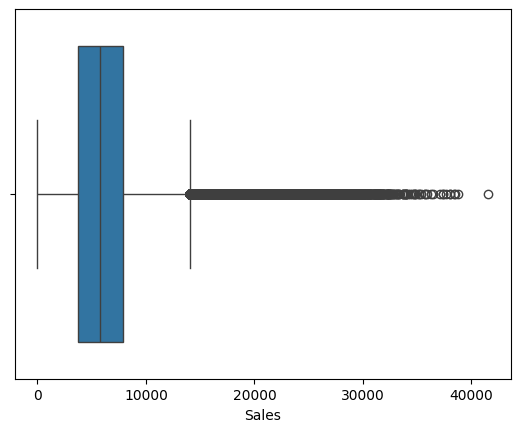

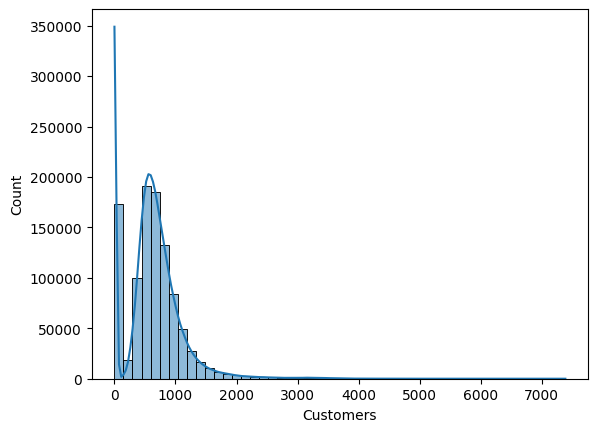

In [8]:
## Observa√ß√£o gr√°fica de como est√° se distribuindo os outliers no dataset.

# Boxplot de vendas
sns.boxplot(x=df_merged['Sales'])
plt.show()

# Histograma de clientes
sns.histplot(df_merged['Customers'], bins=50, kde=True)
plt.show()

## Tratando os outliers do dataset

Tratar outliers nesse dataset √© importante porque esses valores extremos distorcem a distribui√ß√£o das vari√°veis, prejudicam a performance e a interpreta√ß√£o de modelos de machine learning, especialmente os mais sens√≠veis a escala e vari√¢ncia dos dados.


Optei por tratar os outliers de Sales e Customers utilizando tr√™s etapas:

(i) exclus√£o de registros inconsistentes (Sales = 0 em lojas abertas)

(ii) Winsorization, limitando valores extremos fora do intervalo interquart√≠lico (IQR).
Essa abordagem foi escolhida por equilibrar robustez estat√≠stica e preserva√ß√£o da variabilidade natural dos dados.

(iii) Transforma√ß√£o logar√≠tmica (boa para Sales)


Tratar outliers nesse dataset √© fundamental porque esses valores extremos distorcem a distribui√ß√£o das vari√°veis e prejudicam a performance de modelos, especialmente os lineares (Ridge, Lasso), que s√£o sens√≠veis √† escala e vari√¢ncia dos dado e que n√≥s iremos testar adiante nesse trabalho.

===============================================================================

Interpreta√ß√£o Gr√°fica depois de tratado:

===============================================================================

O gr√°fico a seguir objetivo mostrar que o tratamento de outliers foi bem executado com o efeito das tr√™s etapas de tratamento proposta: Exclus√£o de Registros Inconsistentes, da Winsorization e da Transforma√ß√£o Logar√≠tmica (impl√≠cita)



*   Boxplot de Vendas (Sales)

Nesse novo gr√°fico todos os outliers foram eliminados, podemos verificar a aplica√ß√£o da etapa de Winsorization quando percebemos que no gr√°fico anterior os valores de vendas ultrapassavam o limite superior e depois do tratamento n√≥s limitamos ao mesmo, ou seja $14.050.

Isso afeta o modelo pois agora ele treinar√° com uma vari√°vel sales onde o valor m√°ximo foi reduzido para um limite estatisticamente mais sensato, evitando que seja distorcido por picos de vendas raro

*   Histograma de Clientes (Customers)

Observando o gr√°fico, um dos aspectos que mais nos chamam a aten√ß√£o √© a √∫ltima barra do gr√°fico a direita, ela representa o limite superior calculado pelo meu IQR (~1485), essa √© a evid√™ncia da etapa de Winsorization do modelo. Todos os registros que tinham 1500/2000 ou mais clientes, foram limitados e agrupados ao valor m√°ximo.

O modelo agora tem uma vari√°vel customer com o seu impacto mitigado. Se observamos ainda temos uma grande assimetria restante e essa √© a respons√°vel pela a etapa de transforma√ß√£o logaritma, ela √© importante, pois √© quem tornar√° a distribui√ß√£o mais assim√©trica para o treinamento do modelo.

In [9]:
## Tratando os outliers:

# Exclus√£o de registros inconsistentes: Loja aberta e com venda = 0
df_merged = df_merged[~((df_merged['Open'] == 1) & (df_merged['Sales'] == 0))]

# Winsorization (tirando os outliers): Vamos limitar os valores extremos para que n√£o distor√ßam o modelo.
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR # limite inferior para a identifica√ß√£o de outliers. Valores abaixo desse limite s√£o considerados outliers.
    upper_bound = Q3 + 1.5 * IQR #limite superior. Valores acima desse limite s√£o considerados outliers.

    df[column] = np.where(df[column] < lower_bound, lower_bound, #verifica se o valor atual √© menor que o limite inferior. Se for verdade, ele √© substitu√≠do pelo "lower_bound".
                 np.where(df[column] > upper_bound, upper_bound, df[column])) #verifica se o valor √© maior que o limite superior. Se for verdade, ele √© substitu√≠do pelo "upper_bound".
    return df #Retorna o dataframe modificado, com os valores extremos limitados pelos "lower_bound" e "upper_bound".

df_merged = cap_outliers(df_merged, 'Sales') #Aplica√ß√£o de Winsoriza√ß√£o na coluna 'Sales'.
df_merged = cap_outliers(df_merged, 'Customers') #Aplica a Winsoriza√ß√£o √† coluna 'Customers'.

# Criando vari√°vel transformada
df_merged['Sales_log'] = np.log1p(df_merged['Sales'])


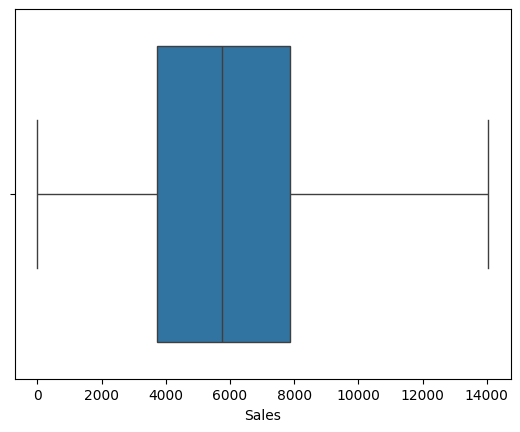

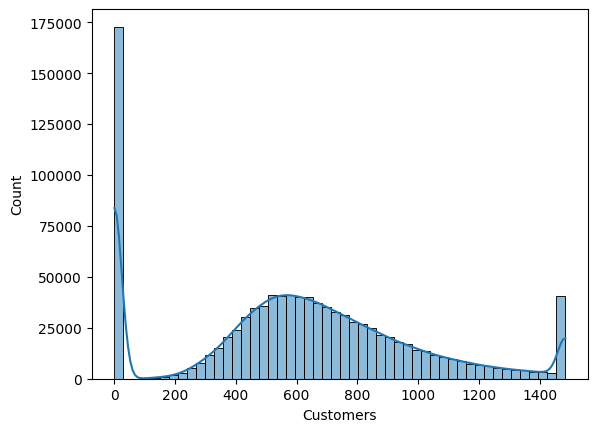

In [10]:
# Boxplot de vendas
sns.boxplot(x=df_merged['Sales'])
plt.show()
## Visualizar outliers


# Histograma de clientes
sns.histplot(df_merged['Customers'], bins=50, kde=True)
plt.show()

## Verifica√ß√£o se todos os outliers foram tratados

===============================================================================

Interpreta√ß√£o do resultado:

===============================================================================

O resultado Outliers encontrados: 0 (0.00%) confirma que a Winsorization (a fun√ß√£o cap_outliers que foi definida) funcionou perfeitamente. Todos os valores extremos que estavam acima dos limites superior de $14.048,00 para Sales e 1.485 para Customers foram limitados a esses respectivos valores.

Este resultado garante que o modelo n√£o ser√° treinado com outliers que poderiam distorcer os coeficientes e prejudicar as previs√µes.

In [11]:
# Fun√ß√£o para contar outliers em uma coluna pelo m√©todo do IQR
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Coluna: {column}")
    print(f" - Total de registros: {df.shape[0]}")
    print(f" - Outliers encontrados: {outliers.shape[0]} ({100*outliers.shape[0]/df.shape[0]:.2f}%)")
    print(f" - Limite inferior: {lower_bound:.2f}, Limite superior: {upper_bound:.2f}")
    print("="*50)
    return outliers

# Verificando em Sales e Customers
outliers_sales = count_outliers_iqr(df_merged, 'Sales')
outliers_customers = count_outliers_iqr(df_merged, 'Customers')

Coluna: Sales
 - Total de registros: 1017155
 - Outliers encontrados: 0 (0.00%)
 - Limite inferior: -2464.00, Limite superior: 14048.00
Coluna: Customers
 - Total de registros: 1017155
 - Outliers encontrados: 0 (0.00%)
 - Limite inferior: -243.00, Limite superior: 1485.00


## Encoding de vari√°veis categ√≥ricas:

Os modelos de Machine Learning n√£o conseguem trabalhar diretamente com vari√°veis do tipo texto. Por isso, foi necess√°rio transformar as vari√°veis categ√≥ricas em representa√ß√µes num√©ricas.

Optou-se por utilizar a t√©cnica de One-Hot Encoding, que cria vari√°veis bin√°rias (0 ou 1) para cada categoria, permitindo que os algoritmos interpretem a informa√ß√£o sem assumir qualquer ordem inexistente entre as classes. Essa t√©cnica foi escolhida porque:

(i) O dataset Rossmann possui vari√°veis nominais (sem ordem natural), como StoreType, Assortment e StateHoliday.

(ii) O uso de One-Hot Encoding garante maior interpretabilidade e compatibilidade tanto com modelos lineares (ex.: Regress√£o Linear, Regress√£o Ridge) quanto com modelos baseados em √°rvores (Random Forest, XGBoost).

OBS: Iremos testar esses modelos mais a frente.

*   Vari√°veis transformadas

As seguintes vari√°veis categ√≥ricas foram identificadas no dataset:

StoreType ‚Üí originalmente 4 categorias (a, b, c, d). Ap√≥s o One-Hot Encoding, foram criadas 3 novas vari√°veis bin√°rias (StoreType_b, StoreType_c, StoreType_d), sendo a categoria a a refer√™ncia (removida por drop_first=True).

Assortment ‚Üí originalmente 3 categorias (a, b, c). Ap√≥s a transforma√ß√£o, foram criadas 2 novas vari√°veis (Assortment_b, Assortment_c), com a como refer√™ncia.

StateHoliday ‚Üí originalmente 4 categorias (0, a, b, c ‚Üí sendo 0 ‚Äúsem feriado‚Äù). Ap√≥s a transforma√ß√£o, foram criadas 3 vari√°veis (StateHoliday_a, StateHoliday_b, StateHoliday_c).

PromoInterval ‚Üí originalmente 12 combina√ß√µes poss√≠veis de intervalos promocionais (ex.: Jan,Apr,Jul,Oct), al√©m da categoria NoPromo. Ap√≥s a transforma√ß√£o, cada intervalo foi convertido em vari√°vel bin√°ria.

*   Resultado final

O objetivo dessa parte do modelo foi garantir que todas as vari√°veis do dataset agora estejam em formato num√©rico, compat√≠vel com os algoritmos de aprendizado de m√°quina que ser√£o utilizados na etapa de modelagem.

In [12]:
# Verificar quais colunas s√£o categ√≥ricas
cat_cols = df_merged.select_dtypes(include=['object']).columns
print("Vari√°veis categ√≥ricas:", cat_cols)

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_merged, columns=cat_cols, drop_first=True)

Vari√°veis categ√≥ricas: Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')


In [13]:
df_encoded.filter(like="StoreType").head()

StoreType_b  StoreType_c  StoreType_d
0        False         True        False
1        False        False        False
2        False        False        False
3        False         True        False
4        False        False        False

# 3. ‚Å†Divis√£o dos dados:

(treino, valida√ß√£o, teste; valida√ß√£o cruzada; sempre evitando vazamento de dados)

## Treino, valida√ß√£o e teste

===============================================================================

Treino, Valida√ß√£o e Teste

===============================================================================

O c√≥digo a seguir ir√° dividir o dataset em treino (80%), valida√ß√£o (10%) e teste (10%), respeitando a ordem temporal.

(i) Treino: de 2013-01-01 at√© 2015-01-30
*   Usado para ajustar (aprender) os par√¢metros do modelo.

(ii) Valida√ß√£o: de 2015-01-30 at√© 2015-05-01
*   Usado para ajustar hiperpar√¢metros (ex.: profundidade da √°rvore, n√∫mero de estimadores, etc.) e comparar modelos sem tocar no teste.

(iii)Teste: de 2015-05-01 at√© 2015-07-31
*   Usado apenas no final, para avaliar o desempenho real do modelo em dados nunca vistos.

===============================================================================

Baseline R¬≤: -0.0045

===============================================================================

Foi utilizado um modelo baseline com DummyRegressor(strategy='mean').
Esse baseline simplesmente prev√™ a m√©dia das vendas do treino para todos os casos.

O baseline teve R¬≤ ‚âà -0.0045, praticamente igual a zero, o que significa que ele n√£o consegue explicar os dados. Isso √© esperado, j√° que prever a m√©dia em s√©ries temporais geralmente √© muito fraco.


In [14]:
# ======================================
# CONFIGURA√á√ÉO DE REPRODUTIBILIDADE
# ======================================

SEED = 42
np.random.seed(SEED)

df_final = df_encoded.copy()

# 1. ORDENAR E RESETAR √çNDICE
df_final = df_final.sort_values('Date').reset_index(drop=True)
# O passo de ordenar os dados por data e, em seguida, resetar o √≠ndice (.reset_index(drop=True)) garante que a indexa√ß√£o manual com .iloc funcione corretamente ap√≥s a ordena√ß√£o.


# 2. DEFINIR X e y
### Separa√ß√£o das vari√°veis preditoras (X) e da vari√°vel alvo (y).
colunas_remover = ["Sales", "Sales_log", "Customers", "Date"]
y = df_final["Sales"]
X = df_final.drop(columns=colunas_remover, errors="ignore")
# Separa√ß√£o das vari√°veis preditoras (X) e da vari√°vel alvo (y).
#fiz esse procedimento, pois as colunas Customers e sales_log estavam dando vazamnento de daods

# 3. DIVIS√ÉO TEMPORAL DOS DADOS
### A divis√£o dos dados em conjuntos de treino, valida√ß√£o e teste de forma temporal, usando fatiamento manual, √© a abordagem correta para s√©ries temporais. Isso previne o vazamento de dados, um dos erros mais comuns em projetos de previs√£o.
train_size = int(0.8 * len(df_final))
val_size = int(0.9 * len(df_final))

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_val = X.iloc[train_size:val_size]
y_val = y.iloc[train_size:val_size]

X_test = X.iloc[val_size:]
y_test = y.iloc[val_size:]

# 4. DOCUMENTAR PER√çODOS
### Exibir os per√≠odos de cada conjunto
print("PER√çODOS DOS CONJUNTOS:")
print(f"Treino: {df_final['Date'].iloc[0]} a {df_final['Date'].iloc[train_size-1]}")
print(f"Valida√ß√£o: {df_final['Date'].iloc[train_size]} a {df_final['Date'].iloc[val_size-1]}")
print(f"Teste: {df_final['Date'].iloc[val_size]} a {df_final['Date'].iloc[-1]}")

# 5. BASELINE
from sklearn.dummy import DummyRegressor
baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train, y_train)
baseline_score = baseline.score(X_test, y_test)
print(f"Baseline R¬≤: {baseline_score:.4f}")

# 6. FIXAR SEED NOS MODELOS
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(
    n_estimators=100,
    random_state=SEED,
    max_features='sqrt'
)

PER√çODOS DOS CONJUNTOS:
Treino: 2013-01-01 00:00:00 a 2015-01-30 00:00:00
Valida√ß√£o: 2015-01-30 00:00:00 a 2015-05-01 00:00:00
Teste: 2015-05-01 00:00:00 a 2015-07-31 00:00:00
Baseline R¬≤: -0.0045


# Valida√ß√£o cruzada + Modelagem + Otimiza√ß√£o de hiperpar√¢metros

A estrat√©gia para fazer a valida√ß√£o cruzada foi usar TimeSeriesSplit com gap=7 e aplicar apenas no conjunto de treino (X_train, y_train).

Isso garante:

Respeito √† ordem temporal: Cada fold s√≥ treina com dados do passado e valida no futuro.

Gap de 7 dias > evita usar observa√ß√µes muito pr√≥ximas entre treino e valida√ß√£o, reduzindo risco de data leakage temporal (quando o modelo aprende padr√µes artificiais de continuidade).

Teste separado > depois de escolher os hiperpar√¢metros via valida√ß√£o cruzada, foi avaliado os modelos no conjunto de teste final, que nunca foi visto antes.

### RANDOM FOREST - Otimizado por MSE e MAE

(i) Ambos os modelos ficaram em torno de R¬≤ ‚âà 0.82, ou seja, explicam cerca de 82% da variabilidade das vendas, um desempenho razo√°vel.

(ii) O modelo otimizado para MSE apresentou MSE e RMSE menores, o que significa que ele √© mais eficaz em lidar com valores grandes/extremos (como picos de vendas em datas especiais, Natal, Black Friday etc.), mas tende a cometer erros maiores no comportamento cotidiano.

(iii) O modelo otimizado para MAE apresentou MAE menor, o que indica que ele √© mais est√°vel para previs√µes do dia a dia, reduzindo a penaliza√ß√£o causada por outliers. Por√©m, como consequ√™ncia, perdeu desempenho em termos de MSE e R¬≤.

--------------------------------------------------------
OBS: Aproximadamente 107 minutos para rodar

--------------------------------------------------------

Limita√ß√£o: No come√ßo foi definido "'n_estimators': randint(50, 500)" O modelo treinaria at√© 500 arvores, por mais que ficasse mais pesado, ficaria mais demorado. Passando para 200, por mais que perca um pouco e acur√°ria a diferen√ßa √© m√≠nima.

In [15]:
# ===============================================================================================
# RANDOM FOREST - Busca de Hiperpar√¢metros (MSE vs MAE) - (Aproximadamente 1.5 horas para rodar)
# ===============================================================================================

# 1. Instanciar o modelo base
modelo = RandomForestRegressor(random_state=SEED)

# 2. Espa√ßo de busca dos hiperpar√¢metros
param_dist = {
    'n_estimators': randint(50, 200),   # mais √°rvores para maior estabilidade j√° que estamos trabalhando com muitos dados
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# 3. Configurar a Valida√ß√£o Cruzada Temporal (apenas no treino!)
tscv = TimeSeriesSplit(n_splits=5, gap=7)

print(f"Configura√ß√£o da Valida√ß√£o Cruzada:")
print(f"- N√∫mero de folds: {tscv.n_splits}")
print(f"- Gap: {tscv.gap} dias")
print(f"- Tamanho aproximado por fold: {len(X_train) // tscv.n_splits} amostras")

# -------------------------------
# BUSCA 1: OTIMIZA√á√ÉO POR MSE
# -------------------------------
print("\n### BUSCA 1: Random Forest otimizado para MSE ###")
random_search_mse = RandomizedSearchCV(
    estimator=modelo,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=1,
    n_jobs=-1,
    random_state=SEED
)

start_time = time.time()
random_search_mse.fit(X_train, y_train)
end_time = time.time()

print("\nMelhores hiperpar√¢metros (MSE):")
print(random_search_mse.best_params_)
print(f"Melhor MSE (CV): {-random_search_mse.best_score_:.4f}")
print(f"Tempo de execu√ß√£o: {(end_time - start_time):.2f} seg")

# -------------------------------
# BUSCA 2: OTIMIZA√á√ÉO POR MAE
# -------------------------------
print("\n### BUSCA 2: Random Forest otimizado para MAE ###")
random_search_mae = RandomizedSearchCV(
    estimator=modelo,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_absolute_error',
    cv=tscv,
    verbose=1,
    n_jobs=-1,
    random_state=SEED
)

start_time = time.time()
random_search_mae.fit(X_train, y_train)
end_time = time.time()

print("\nMelhores hiperpar√¢metros (MAE):")
print(random_search_mae.best_params_)
print(f"Melhor MAE (CV): {-random_search_mae.best_score_:.4f}")
print(f"Tempo de execu√ß√£o: {(end_time - start_time):.2f} seg")

# -------------------------------
# AVALIA√á√ÉO FINAL EM TESTE
# -------------------------------
# Modelo otimizado para MSE
best_model_mse = random_search_mse.best_estimator_
y_test_pred_mse = best_model_mse.predict(X_test)

mse_rf_mse = mean_squared_error(y_test, y_test_pred_mse)
rmse_rf_mse = np.sqrt(mse_rf_mse)
mae_rf_mse = mean_absolute_error(y_test, y_test_pred_mse)
r2_rf_mse = r2_score(y_test, y_test_pred_mse)

# Modelo otimizado para MAE
best_model_mae = random_search_mae.best_estimator_
y_test_pred_mae = best_model_mae.predict(X_test)

mse_rf_mae = mean_squared_error(y_test, y_test_pred_mae)
rmse_rf_mae = np.sqrt(mse_rf_mae)
mae_rf_mae = mean_absolute_error(y_test, y_test_pred_mae)
r2_rf_mae = r2_score(y_test, y_test_pred_mae)

# -------------------------------
# COMPARA√á√ÉO FINAL ENTRE OS DOIS
# -------------------------------

resultados_rf = pd.DataFrame([
    {
        "Modelo": "Random Forest (otimizado MSE)",
        "MSE": mse_rf_mse,
        "RMSE": rmse_rf_mse,
        "MAE": mae_rf_mse,
        "R¬≤": r2_rf_mse
    },
    {
        "Modelo": "Random Forest (otimizado MAE)",
        "MSE": mse_rf_mae,
        "RMSE": rmse_rf_mae,
        "MAE": mae_rf_mae,
        "R¬≤": r2_rf_mae
    }
])

print("\n===== COMPARA√á√ÉO RANDOM FOREST =====")
print(resultados_rf)


Configura√ß√£o da Valida√ß√£o Cruzada:
- N√∫mero de folds: 5
- Gap: 7 dias
- Tamanho aproximado por fold: 162744 amostras

### BUSCA 1: Random Forest otimizado para MSE ###
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Melhores hiperpar√¢metros (MSE):
{'bootstrap': False, 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 107}
Melhor MSE (CV): 2469135.0133
Tempo de execu√ß√£o: 3170.36 seg

### BUSCA 2: Random Forest otimizado para MAE ###
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Melhores hiperpar√¢metros (MAE):
{'bootstrap': False, 'max_depth': 18, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 104}
Melhor MAE (CV): 1021.8956
Tempo de execu√ß√£o: 3504.60 seg

===== COMPARA√á√ÉO RANDOM FOREST =====
                          Modelo        MSE    RMSE     MAE   R¬≤
0  Random Forest (otimizado MSE) 2378279.44 1542.17 1067.34 0.82
1  Random Forest (otimizado MAE) 

### RIDGE E LASSO

Lasso e Ridge s√£o modelos de regress√£o linear que adicionam um "penalidade" √† fun√ß√£o de custo. Isso impede que os coeficientes do modelo fiquem muito grandes e ajuda a evitar o overfitting (o modelo se ajustar demais ao ru√≠do dos dados de treino, perdendo poder de generaliza√ß√£o).

- RESULTADO OBTIDO:

Ambos os modelos t√™m R¬≤ em torno de 0.63, ou seja, explicam cerca de 63% da variabilidade das vendas.

Isso √© pior que o Random Forest (que chegou a R¬≤ = 0.83).

Mostra que modelos lineares (Ridge e Lasso) t√™m mais dificuldade de capturar padr√µes complexos das vendas (promo√ß√µes, sazonalidade n√£o linear, intera√ß√µes de vari√°veis).

- COMPARA√á√ÉO RIDGE VS. LASSO

(i) Ridge teve RMSE um pouco menor, lida levemente melhor com picos.

(ii) Lasso teve MAE um pouco menor, previs√µes m√©dias ligeiramente melhores.

Na pr√°tica, a diferen√ßa √© m√≠nima.

- TEMPO DE EXECU√á√ÉO:

Ridge: ~57 segundos

Lasso: ~762 segundos (bem mais lento, porque zera coeficientes e exige mais itera√ß√µes de otimiza√ß√£o).

**Nesse caso, Ridge √© prefer√≠vel: desempenho quase igual, mas muito mais r√°pido.**

--------------------------------------------------------
OBS: Aproximadamente 16 minutos para rodar

--------------------------------------------------------

In [16]:
# ==============================================================================
# TREINAMENTO E AVALIA√á√ÉO: RIDGE E LASSO (Aproximadamente 14 minutos para rodar)
# ===============================================================================

# 1. Definir colunas num√©ricas e categ√≥ricas
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

# 2. Pr√©-processamento
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 3. Pipelines para Ridge e Lasso
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(random_state=SEED))
])

lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(random_state=SEED))
])

# 4. Definir espa√ßo de busca de hiperpar√¢metros
param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# 5. GridSearchCV para Ridge
print("Iniciando GridSearch para Ridge...")
start_time_ridge = time.time()
grid_ridge = GridSearchCV(ridge_pipeline, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_ridge.fit(X_train, y_train)
end_time_ridge = time.time()
print(f"GridSearch Ridge conclu√≠do em {(end_time_ridge - start_time_ridge):.2f} segundos.")

# 6. GridSearchCV para Lasso
print("\nIniciando GridSearch para Lasso...")
start_time_lasso = time.time()
grid_lasso = GridSearchCV(lasso_pipeline, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_lasso.fit(X_train, y_train)
end_time_lasso = time.time()
print(f"GridSearch Lasso conclu√≠do em {(end_time_lasso - start_time_lasso):.2f} segundos.")

# 7. Avalia√ß√£o dos melhores modelos
print("\nAvalia√ß√£o dos melhores modelos nos dados de teste:")

# Ridge
best_ridge = grid_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\n--- Ridge (melhor alpha={grid_ridge.best_params_['regressor__alpha']}) ---")
print(f"MSE:  {mse_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"MAE:  {mae_ridge:.4f}")
print(f"R¬≤:   {r2_ridge:.4f}")

# Lasso
best_lasso = grid_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\n--- Lasso (melhor alpha={grid_lasso.best_params_['regressor__alpha']}) ---")
print(f"MSE:  {mse_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.4f}")
print(f"MAE:  {mae_lasso:.4f}")
print(f"R¬≤:   {r2_lasso:.4f}")

Iniciando GridSearch para Ridge...
GridSearch Ridge conclu√≠do em 63.68 segundos.

Iniciando GridSearch para Lasso...
GridSearch Lasso conclu√≠do em 842.61 segundos.

Avalia√ß√£o dos melhores modelos nos dados de teste:

--- Ridge (melhor alpha=10) ---
MSE:  4833285.1253
RMSE: 2198.4734
MAE:  1615.1920
R¬≤:   0.6347

--- Lasso (melhor alpha=10) ---
MSE:  4868264.5329
RMSE: 2206.4144
MAE:  1611.2855
R¬≤:   0.6320


### XGBOOST

Dado que o dataset Rossman, optei por tamb√©m testar um modelo para esse tipo de dado, XGBOOST. Ele consegue capturar rela√ß√µes n√£o lineares e complexas, modelos lineares (Ridge, Lasso) s√≥ capturam rela√ß√µes lineares simples. J√° o XGBoost constr√≥i v√°rias √°rvores e combina seus resultados, conseguindo aprender padr√µes mais sutis, como:
- Promo√ß√£o no s√°bado aumenta vendas mais que na segunda
- Feriado seguido de fim de semana gera queda forte

DOS RESULTADOS DO MODELO:


(i) MSE (1.285.049,25)

Mostra que o XGBoost est√° capturando muito bem as varia√ß√µes de venda.

(ii) RMSE (1.133,00)

Em m√©dia, o modelo erra cerca de 1.133 unidades por previs√£o.

(iii) MAE (788,13)

Em termos absolutos, o modelo erra em m√©dia menos de 800 unidades por dia/loja.

(iv) R¬≤ (0.9029)

O modelo explica ~90% da vari√¢ncia das vendas.

--------------------------------------------------------
OBS: Aproximadamente 103 minutos para rodar

--------------------------------------------------------

In [17]:
# ================================================================================
# TREINAMENTO E AVALIA√á√ÉO: XGBOOST (Aproximadamente 103 minutos para rodar)
# =================================================================================

# 1. Criar pipeline do XGBoost (mantemos consist√™ncia com outros modelos)
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        objective='reg:squarederror',
        random_state=SEED,
        n_jobs=-1
    ))
])

# 2. Definir espa√ßo de busca de hiperpar√¢metros
param_grid_xgb = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 6, 10],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__subsample': [0.8, 1],
    'regressor__colsample_bytree': [0.8, 1]
}

# 3. GridSearchCV para XGBoost (com valida√ß√£o temporal)
print("\nIniciando GridSearch para XGBoost...")
start_time_xgb = time.time()
grid_xgb = GridSearchCV(
    xgb_pipeline,
    param_grid_xgb,
    cv=tscv,  # TimeSeriesSplit aqui
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_xgb.fit(X_train, y_train)
end_time_xgb = time.time()
print(f"GridSearch XGBoost conclu√≠do em {(end_time_xgb - start_time_xgb):.2f} segundos.")

# 4. Avalia√ß√£o do melhor modelo
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"\n--- XGBoost (melhores par√¢metros: {grid_xgb.best_params_}) ---")
print(f"MSE:  {mse_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE:  {mae_xgb:.4f}")
print(f"R¬≤:   {r2_xgb:.4f}")


Iniciando GridSearch para XGBoost...
GridSearch XGBoost conclu√≠do em 7434.94 segundos.

--- XGBoost (melhores par√¢metros: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 10, 'regressor__n_estimators': 300, 'regressor__subsample': 0.8}) ---
MSE:  1285049.2532
RMSE: 1133.6001
MAE:  788.1320
R¬≤:   0.9029


## Compara√ß√£o entre os modelos

=============================================================================

Compara√ß√£o Final dos Modelos

=============================================================================

**XGBoost**

MSE: 1,285,049.25 (o menor entre todos)

RMSE: 1,133.60 (bem abaixo dos outros modelos)

MAE: 788.13 (o menor, melhor erro m√©dio absoluto)

R¬≤: 0.903 (o mais pr√≥ximo de 1, melhor explica√ß√£o da variabilidade)

Conclus√£o: Modelo mais robusto, consistente e com menor erro, capturando melhor as varia√ß√µes nas vendas.

**Random Forest (otimizado MSE)**

MSE: 2,378,279.44

RMSE: 1,542.17

MAE: 1,067.34

R¬≤: 0.820

Um bom modelo, mas significativamente pior que o XGBoost. Ainda assim, √∫til como baseline forte.

**Random Forest (otimizado MAE)**

MSE: 2,414,543.20

RMSE: 1,553.88

MAE: 994.48

R¬≤: 0.817

Muito parecido com o anterior, com foco em reduzir o erro m√©dio absoluto.
Por√©m, perdeu um pouco em MSE/R¬≤, mostrando que o ajuste n√£o foi t√£o eficiente quanto o XGBoost.

**Ridge**

MSE: 4,833,285.13
RMSE: 2,198.47
MAE: 1,615.19
R¬≤: 0.635

Fraco em compara√ß√£o √†s √°rvores (XGBoost/Random Forest). Indica que o relacionamento entre features e vendas n√£o √© linear.

**Lasso**

MSE: 4,868,264.53
RMSE: 2,206.41
MAE: 1,611.29
R¬≤: 0.632

Muito pr√≥ximo ao Ridge ‚Üí ambos sofrem para modelar o problema.
Isso mostra que regress√µes lineares regulares n√£o s√£o adequadas para prever vendas do Rossmann.

=============================================================================

Conclus√£o Geral:

=============================================================================

Melhor modelo: XGBoost.

Modelos medianos: Random Forests.

Modelos fracos: Ridge e Lasso.

**Portanto, para prever as vendas das pr√≥ximas semanas/meses, o XGBoost √© o modelo final recomendado, garantindo erros mais baixos e maior poder explicativo (R¬≤).**

In [18]:

# =====================================================
# DATAFRAME FINAL DE COMPARA√á√ÉO ENTRE OS MODELOS
# =====================================================

resultados_finais = pd.DataFrame([
    {
        "Modelo": "Ridge",
        "MSE": mse_ridge,
        "RMSE": rmse_ridge,
        "MAE": mae_ridge,
        "R¬≤": r2_ridge
    },
    {
        "Modelo": "Lasso",
        "MSE": mse_lasso,
        "RMSE": rmse_lasso,
        "MAE": mae_lasso,
        "R¬≤": r2_lasso
    },
    {
        "Modelo": "Random Forest (otimizado MSE)",
        "MSE": mse_rf_mse,
        "RMSE": rmse_rf_mse,
        "MAE": mae_rf_mse,
        "R¬≤": r2_rf_mse
    },
    {
        "Modelo": "Random Forest (otimizado MAE)",
        "MSE": mse_rf_mae,
        "RMSE": rmse_rf_mae,
        "MAE": mae_rf_mae,
        "R¬≤": r2_rf_mae
    },
    {
        "Modelo": "XGBoost",
        "MSE": mse_xgb,
        "RMSE": rmse_xgb,
        "MAE": mae_xgb,
        "R¬≤": r2_xgb
    }
])

# Ordenar pelo R¬≤ (melhor para pior)
resultados_finais = resultados_finais.sort_values(by="R¬≤", ascending=False).reset_index(drop=True)

print("\n" + "="*60)
print("COMPARA√á√ÉO FINAL ENTRE TODOS OS MODELOS")
print("="*60)

# Formatar n√∫meros para melhor visualiza√ß√£o
resultados_formatados = resultados_finais.copy()
resultados_formatados['MSE'] = resultados_formatados['MSE'].apply(lambda x: f"{x:,.2f}")
resultados_formatados['RMSE'] = resultados_formatados['RMSE'].apply(lambda x: f"{x:,.2f}")
resultados_formatados['MAE'] = resultados_formatados['MAE'].apply(lambda x: f"{x:,.2f}")
resultados_formatados['R¬≤'] = resultados_formatados['R¬≤'].apply(lambda x: f"{x:.3f}")

print(tabulate(resultados_formatados, headers='keys', tablefmt='grid', stralign='center', showindex=False))


COMPARA√á√ÉO FINAL ENTRE TODOS OS MODELOS
+-------------------------------+--------------+----------+----------+-------+
|            Modelo             |     MSE      |   RMSE   |   MAE    |    R¬≤ |
+===============================+==============+==========+==========+=======+
|            XGBoost            | 1,285,049.25 | 1,133.60 |  788.13  | 0.903 |
+-------------------------------+--------------+----------+----------+-------+
| Random Forest (otimizado MSE) | 2,378,279.44 | 1,542.17 | 1,067.34 | 0.82  |
+-------------------------------+--------------+----------+----------+-------+
| Random Forest (otimizado MAE) | 2,414,543.20 | 1,553.88 |  994.48  | 0.817 |
+-------------------------------+--------------+----------+----------+-------+
|             Ridge             | 4,833,285.13 | 2,198.47 | 1,615.19 | 0.635 |
+-------------------------------+--------------+----------+----------+-------+
|             Lasso             | 4,868,264.53 | 2,206.41 | 1,611.29 | 0.632 |
+-------


===== COMPARA√á√ÉO FINAL ENTRE TODOS OS MODELOS =====
                          Modelo        MSE    RMSE     MAE   R¬≤
0                        XGBoost 1285049.25 1133.60  788.13 0.90
1  Random Forest (otimizado MSE) 2378279.44 1542.17 1067.34 0.82
2  Random Forest (otimizado MAE) 2414543.20 1553.88  994.48 0.82
3                          Ridge 4833285.13 2198.47 1615.19 0.63
4                          Lasso 4868264.53 2206.41 1611.29 0.63


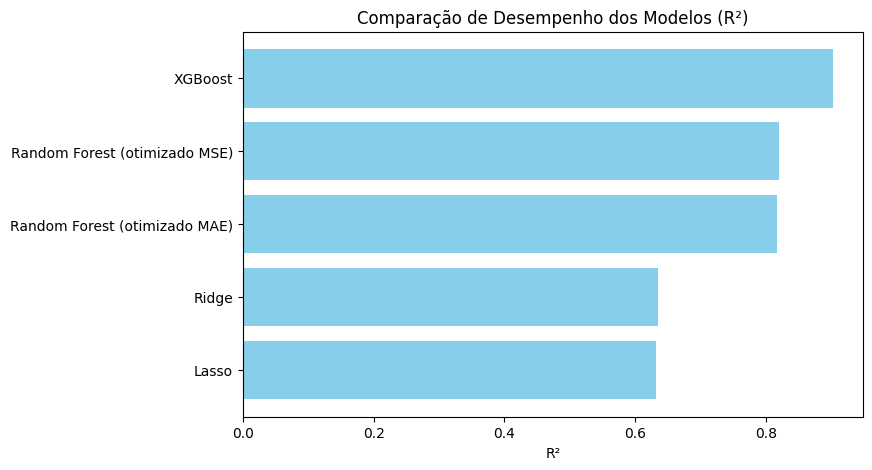

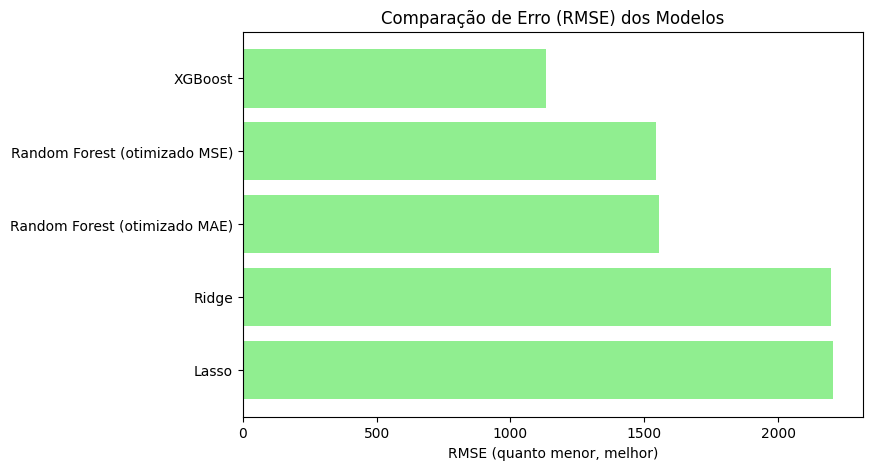

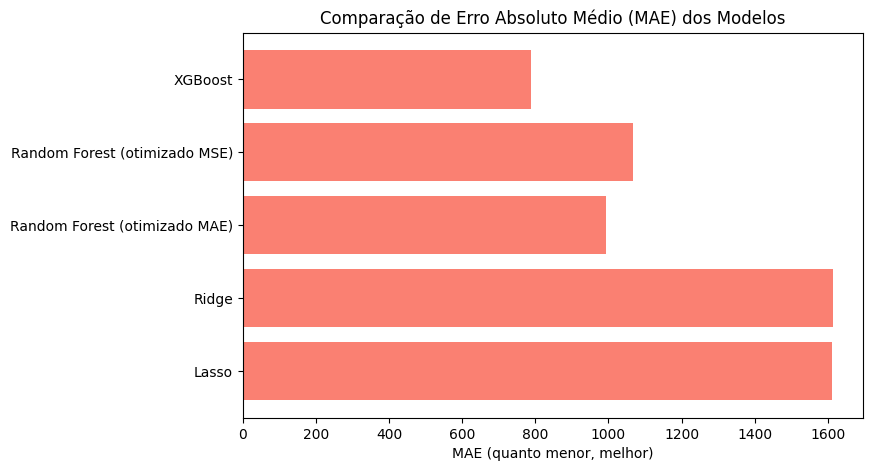

In [19]:
# =====================================================
# COMPARA√á√ÉO FINAL ENTRE TODOS OS MODELOS + VISUALIZA√á√ÉO
# =====================================================

# Consolidar resultados
resultados_finais = pd.DataFrame([
    {
        "Modelo": "Ridge",
        "MSE": mse_ridge,
        "RMSE": rmse_ridge,
        "MAE": mae_ridge,
        "R¬≤": r2_ridge
    },
    {
        "Modelo": "Lasso",
        "MSE": mse_lasso,
        "RMSE": rmse_lasso,
        "MAE": mae_lasso,
        "R¬≤": r2_lasso
    },
    {
        "Modelo": "Random Forest (otimizado MSE)",
        "MSE": mse_rf_mse,
        "RMSE": rmse_rf_mse,
        "MAE": mae_rf_mse,
        "R¬≤": r2_rf_mse
    },
    {
        "Modelo": "Random Forest (otimizado MAE)",
        "MSE": mse_rf_mae,
        "RMSE": rmse_rf_mae,
        "MAE": mae_rf_mae,
        "R¬≤": r2_rf_mae
    },
    {
        "Modelo": "XGBoost",
        "MSE": mse_xgb,
        "RMSE": rmse_xgb,
        "MAE": mae_xgb,
        "R¬≤": r2_xgb
    }
])

# Ordenar pelo R¬≤ (melhor para pior)
resultados_finais = resultados_finais.sort_values(by="R¬≤", ascending=False).reset_index(drop=True)

print("\n===== COMPARA√á√ÉO FINAL ENTRE TODOS OS MODELOS =====")
print(resultados_finais)

# =====================================================
# VISUALIZA√á√ïES
# =====================================================

# Gr√°fico R¬≤
plt.figure(figsize=(8,5))
plt.barh(resultados_finais["Modelo"], resultados_finais["R¬≤"], color="skyblue")
plt.xlabel("R¬≤")
plt.title("Compara√ß√£o de Desempenho dos Modelos (R¬≤)")
plt.gca().invert_yaxis()
plt.show()

# Gr√°fico RMSE
plt.figure(figsize=(8,5))
plt.barh(resultados_finais["Modelo"], resultados_finais["RMSE"], color="lightgreen")
plt.xlabel("RMSE (quanto menor, melhor)")
plt.title("Compara√ß√£o de Erro (RMSE) dos Modelos")
plt.gca().invert_yaxis()
plt.show()

# Gr√°fico MAE
plt.figure(figsize=(8,5))
plt.barh(resultados_finais["Modelo"], resultados_finais["MAE"], color="salmon")
plt.xlabel("MAE (quanto menor, melhor)")
plt.title("Compara√ß√£o de Erro Absoluto M√©dio (MAE) dos Modelos")
plt.gca().invert_yaxis()
plt.show()

# Resultado

Como comentado anteriormente, o resultado do modelo XGBoost foi mais robusto, consistente e com menor erro, capturando melhor as varia√ß√µes nas vendas.

O que vamos fazer agora √© utilizar o modelo XGBoost para gerar previs√µes de vendas futuras, o que de fato √© esperado pelo trabalho proosto.

Vamos sair do hist√≥rico (treino/teste do Rossmann) e projetar vendas futuras. Para isso, criamos 30 dias de datas ap√≥s a √∫ltima observa√ß√£o real do dataset. Nelas, simulamos diferentes cen√°rios de promo√ß√µes (nenhuma, todas, ou padr√£o hist√≥rico).

A ideia √© usar o modelo treinado (XGBoost) para responder:

üëâ Como ficariam as vendas nas pr√≥ximas semanas se adot√°ssemos cada uma dessas estrat√©gias de promo√ß√£o?

**1. Tr√™s cen√°rios simulados**

- Sem Promo√ß√µes (azul):
O modelo projetou vendas mais baixas e relativamente est√°veis. Isso mostra que a promo√ß√£o tem um impacto significativo no aumento das vendas.

- Com Promo√ß√µes (todas) (laranja):
Aqui voc√™ for√ßou o modelo a acreditar que todos os dias haver√° promo√ß√µes.
Resultado: as vendas previstas ficaram bem mais altas e tamb√©m mais regulares.
O comportamento "em degraus" que aparece pode vir de padr√µes aprendidos no hist√≥rico (ex.: promo√ß√µes frequentes elevam o piso de vendas).

- Promo√ß√µes Hist√≥ricas (verde):
Neste cen√°rio, voc√™ imitou o padr√£o t√≠pico do dataset (promo√ß√µes √†s sextas e s√°bados).
O gr√°fico mostra que nos dias com promo√ß√£o, as vendas sobem bastante (picos), e nos outros dias caem, mas ainda ficam acima do cen√°rio sem promo√ß√µes.

**2. O que o modelo aprendeu**

- O impacto de promo√ß√µes √© claro: sempre que Promo=1, as vendas sobem.

- O modelo tamb√©m respeita padr√µes sazonais semanais: repare nas ondula√ß√µes c√≠clicas (picos e vales repetidos semanalmente).

- O fato de o cen√°rio ‚Äútodas as promo√ß√µes‚Äù ficar acima dos outros indica que o XGBoost capturou bem que promo√ß√µes s√£o uma das vari√°veis mais fortes do dataset Rossmann.

**3. Como interpretar para decis√£o de neg√≥cio**

- Se a loja n√£o fizer promo√ß√µes ‚Üí vendas tendem a ficar no piso (linha azul).

- Se fizer promo√ß√µes em todos os dias ‚Üí a previs√£o √© de um ganho expressivo (linha laranja), mas na pr√°tica isso pode reduzir margem de lucro.

- Se fizer promo√ß√µes em padr√£o hist√≥rico (sextas/s√°bados) ‚Üí h√° picos localizados, refor√ßando a estrat√©gia de usar promo√ß√µes em dias de maior movimento (linha verde).

Colunas esperadas pelo modelo: 21 -> ['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'CompetitionAgeInMonths', 'Promo2AgeInMonths', 'StateHoliday_0']...
Aten√ß√£o: existem 1115 stores. Vou prever apenas as primeiras 10. Ajuste max_stores_to_forecast se desejar mais.
Tempo de execu√ß√£o: 5.03 s
Linhas previstas: 900


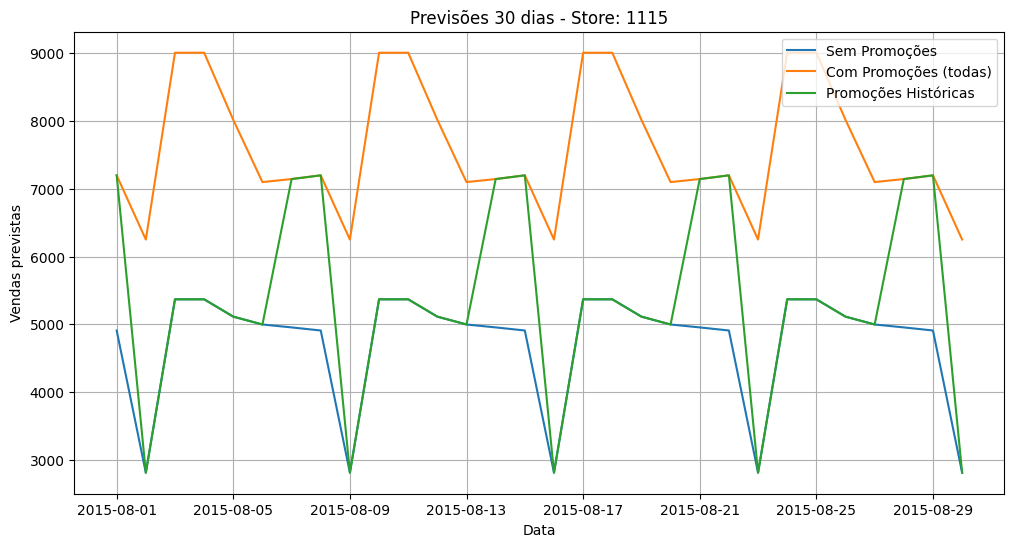

In [20]:
# ==============================
# PREVIS√ÉO 30 DIAS - VERS√ÉO ROBUSTA
# ==============================

# ---------- checagens iniciais ----------
# Verifica se vari√°veis essenciais existem
if 'best_xgb' not in globals():
    raise NameError("best_xgb n√£o encontrado. Rode o treinamento e atribua best_xgb = grid_xgb.best_estimator_ antes.")

if 'X_train' not in globals():
    raise NameError("X_train n√£o encontrado. Execute novamente a etapa de split (X_train, y_train).")

# determinar √∫ltima data usando df_final (se existir) ou X (se contiver Date)
if 'df_final' in globals() and 'Date' in df_final.columns:
    ultimo_dia = df_final['Date'].max()
elif 'Date' in X.columns:
    ultimo_dia = X['Date'].max()
else:
    raise NameError("Nenhuma coluna 'Date' encontrada em df_final nem em X. Garanta que a coluna Date esteja dispon√≠vel.")

# horizonte
datas_futuras = pd.date_range(start=ultimo_dia + pd.Timedelta(days=1), periods=30, freq="D")

# ---------- cen√°rios (exemplo) ----------
cenarios = {
    "Sem Promo√ß√µes": pd.DataFrame({"Date": datas_futuras, "Promo": 0}),
    "Com Promo√ß√µes (todas)": pd.DataFrame({"Date": datas_futuras, "Promo": 1}),
    "Promo√ß√µes Hist√≥ricas": pd.DataFrame({"Date": datas_futuras,
                                         "Promo": [1 if d.weekday() in [4,5] else 0 for d in datas_futuras]})
}

# extrair colunas esperadas pelo pipeline
def get_expected_input_columns(pipeline, fallback_X):
    if hasattr(pipeline, "named_steps") and "preprocessor" in pipeline.named_steps:
        pre = pipeline.named_steps["preprocessor"]
        expected = []
        # transformers_ existe ap√≥s fit, e cada item √© (name, transformer, columns)
        for name, transformer, cols in pre.transformers_:
            if cols is None or cols == 'drop':
                continue
            # cols pode ser uma lista de nomes
            expected.extend(list(cols))
        return expected
    else:
        # fallback: usar as colunas do X (assume que X cont√©m as colunas corretas)
        return list(fallback_X.columns)

input_cols = get_expected_input_columns(best_xgb, X_train)
print(f"Colunas esperadas pelo modelo: {len(input_cols)} -> {input_cols[:10]}{'...' if len(input_cols)>10 else ''}")

# ---------- stores a prever (opcional) ----------
# se 'Store' √© uma coluna requerida, prev√™ por cada store; sen√£o prev√™ s√≥ uma vez
if 'Store' in X_train.columns and 'Store' in input_cols:
    unique_stores = X_train['Store'].unique()
else:
    unique_stores = [None]

# limite prudente (ajuste se quiser prever para todos)
max_stores_to_forecast = 10
stores_to_forecast = unique_stores[:max_stores_to_forecast]

if len(unique_stores) > max_stores_to_forecast:
    print(f"Aten√ß√£o: existem {len(unique_stores)} stores. Vou prever apenas as primeiras {max_stores_to_forecast}. Ajuste max_stores_to_forecast se desejar mais.")

# ---------- criar e preencher df_future para cada store + cen√°rio ----------
df_forecasts = []
start_time = time.time()

for store in stores_to_forecast:
    for nome, df_temp in cenarios.items():
        df_future = df_temp.copy()
        # features temporais que voc√™ provavelmente j√° precisa
        df_future["DayOfWeek"] = df_future["Date"].dt.dayofweek
        df_future["Month"] = df_future["Date"].dt.month
        df_future["Year"] = df_future["Date"].dt.year

        # se 'Store' for necess√°ria, adicionar coluna com id do store atual
        if store is not None and 'Store' in input_cols:
            df_future['Store'] = store

        # Preencher as colunas que faltam com mediana/mode do X_train
        for col in input_cols:
            if col in df_future.columns:
                continue  # j√° presente
            if col in X_train.columns:
                # distinguir num√©ricas de categ√≥ricas
                if np.issubdtype(X_train[col].dtype, np.number):
                    df_future[col] = X_train[col].median()
                else:
                    # usar a moda; se houver NaN, pegar primeiro valor n√£o-nulo
                    mode_vals = X_train[col].mode()
                    if len(mode_vals) > 0:
                        df_future[col] = mode_vals.iloc[0]
                    else:
                        df_future[col] = X_train[col].dropna().unique()[0] if X_train[col].dropna().size>0 else 0
            else:
                # fallback gen√©rico (0) - ajuste manual se necess√°rio (ex.: Open=1, CompetitionDistance mediana, etc.)
                df_future[col] = 0

        # Garante a ordem/colunas necess√°rias
        X_future = df_future[input_cols]

        # previs√µes (o pipeline aplicar√° pr√©-processamento automaticamente)
        y_pred = best_xgb.predict(X_future)

        # montar sa√≠da
        df_out = pd.DataFrame({
            "Data": df_future["Date"].values,
            "Store": store if store is not None else "all",
            "Cenario": nome,
            "Previsao_Vendas": y_pred
        })
        df_forecasts.append(df_out)

end_time = time.time()
df_forecasts = pd.concat(df_forecasts, ignore_index=True)
print(f"Tempo de execu√ß√£o: {end_time - start_time:.2f} s")
print(f"Linhas previstas: {len(df_forecasts)}")

# ---------- visualiza√ß√£o (exemplo: primeiro store previsto) ----------
sample_store = stores_to_forecast[0] if stores_to_forecast[0] is not None else "all"
plt.figure(figsize=(12,6))
for nome in cenarios.keys():
    subset = df_forecasts[(df_forecasts["Cenario"]==nome) & (df_forecasts["Store"]==sample_store)]
    if subset.empty:
        continue
    plt.plot(subset["Data"], subset["Previsao_Vendas"], label=f"{nome}")

plt.title(f"Previs√µes 30 dias - Store: {sample_store}")
plt.xlabel("Data")
plt.ylabel("Vendas previstas")
plt.legend()
plt.grid(True)
plt.show()